This file is available on https://github.com/sidchaini/PHYS838/blob/main/630/hw5_p5p6.ipynb

### Problem 5

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
from astroML.datasets import fetch_dr7_quasar
sns.set_theme(context="paper", style="whitegrid", font_scale=1.1,
              rc = {'xtick.bottom': False, 'xtick.top': False, 'ytick.left': False, 'ytick.right': False,
                   'axes.grid': False,  'axes.edgecolor': '.15'})

In [2]:
data = fetch_dr7_quasar ()
data.shape

(105783,)

In [3]:
data.dtype.names [:5]

('sdssID', 'RA', 'dec', 'redshift', 'mag_u')

In [4]:
data = data
u = data['mag_u']
g = data['mag_g']
r = data['mag_r']
i = data['mag_i']
z = data['mag_z']
redshift = data['redshift']

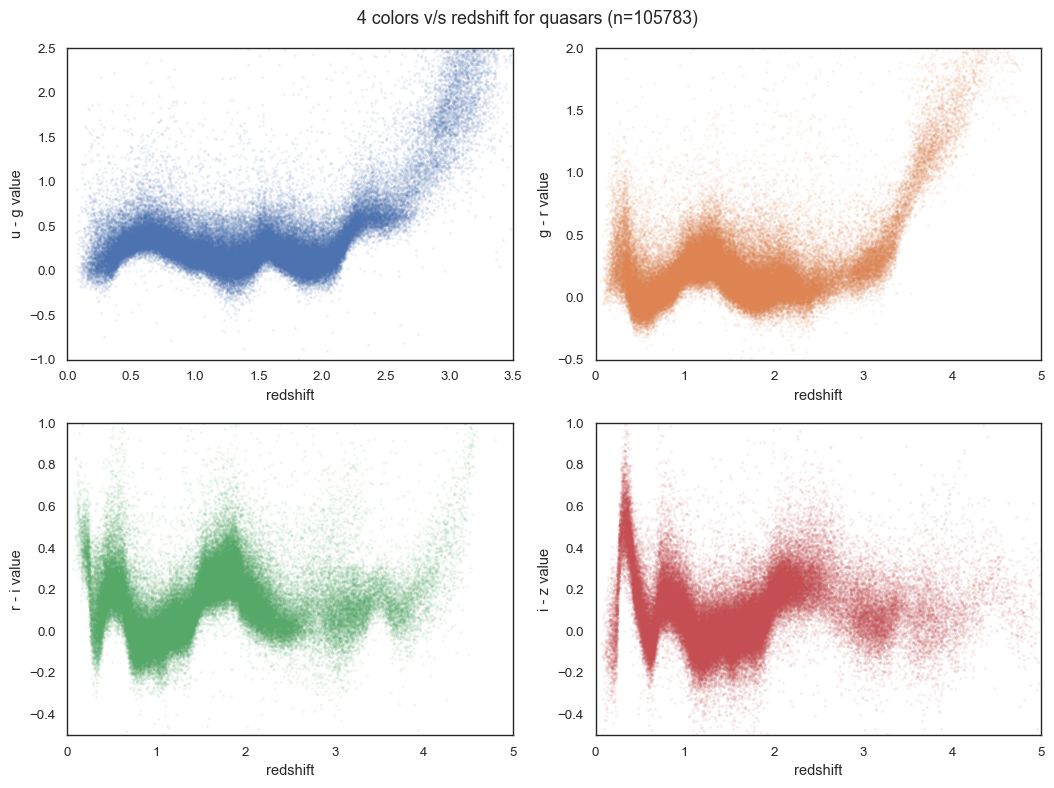

In [5]:
fig, axs = plt.subplots(2,2, figsize=(10.6666, 8))
(ax0,ax1,ax2,ax3) = axs.ravel()
ax0.scatter(redshift, u - g, s=4, color=sns.color_palette()[0], linewidth=0, alpha=0.1)
ax0.set_xlim(0,3.5)
ax0.set_ylim(-1,2.5)
ax0.set_xlabel("redshift")
ax0.set_ylabel("u - g value")

ax1.scatter(redshift, g - r, s=4, color=sns.color_palette()[1], linewidth=0, alpha=0.1)
ax1.set_xlim(0, 5)
ax1.set_ylim(-0.5, 2.0)
ax1.set_xlabel("redshift")
ax1.set_ylabel("g - r value")

ax2.scatter(redshift, r - i, s=4, color=sns.color_palette()[2], linewidth=0, alpha=0.1)
ax2.set_xlim(0, 5)
ax2.set_ylim(-0.5, 1.0)
ax2.set_xlabel("redshift")
ax2.set_ylabel("r - i value")

ax3.scatter(redshift, i - z, s=4, color=sns.color_palette()[3], linewidth=0, alpha=0.1)
ax3.set_xlim(0, 5)
ax3.set_ylim(-0.5, 1.0)
ax3.set_xlabel("redshift")
ax3.set_ylabel("i - z value")

plt.suptitle(f"4 colors v/s redshift for quasars (n={len(u)})")

plt.tight_layout()
plt.savefig("figure.png", dpi=300)
plt.show()

### Problem 6

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

In [8]:
df = pd.DataFrame.from_records(data)

In [9]:
y = df["redshift"].to_numpy()

In [10]:
X = df[['mag_u','mag_g','mag_r','mag_i','mag_z']].to_numpy()

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=44)

In [12]:
# Create a random forest regressor
rf = RandomForestRegressor(n_estimators=100, random_state=44)

# Fit the model to the data
rf.fit(X_train, y_train)

RandomForestRegressor(random_state=44)

In [13]:
y_test_pred = rf.predict(X_test)

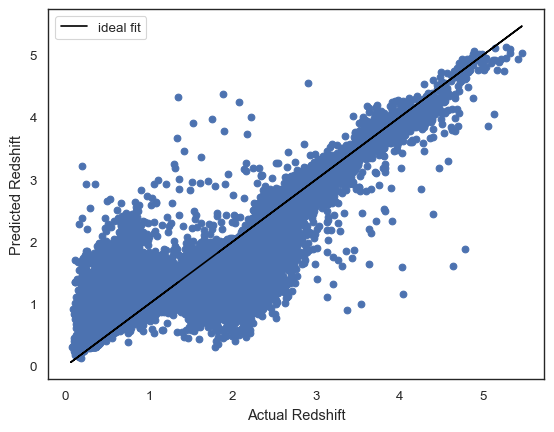

In [14]:
plt.scatter(y_test, y_test_pred)
plt.xlabel('Actual Redshift')
plt.ylabel('Predicted Redshift')
plt.plot(y,y, c="black", label="ideal fit")
plt.legend()
plt.show()

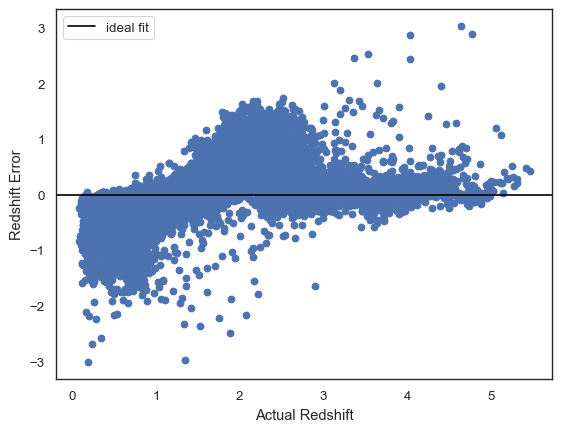

In [15]:
plt.scatter(y_test, y_test-y_test_pred)
plt.xlabel('Actual Redshift')
plt.ylabel('Redshift Error')
plt.axhline(0, c="black", label="ideal fit")
plt.legend()
plt.show()